In [ ]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import urllib.request, json
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler

In [ ]:

nsdq = pd.read_csv('/content/nasdaq_batch_nasdaq_100_data_20100101_20231012.csv')
# Convert 'date_column' to datetime format if it's not already in datetime
nsdq['Date'] = pd.to_datetime(nsdq['Date'])
nsdq.sort_values(by='Date',ascending=True)
# Set 'date_column' as the index
nsdq.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

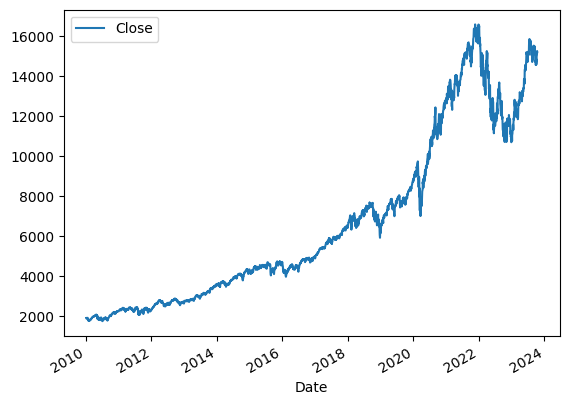

In [ ]:
nsdq.plot.line(y='Close',use_index=True)

In [ ]:
nsdq['next_day'] = nsdq['Close'].shift(-1)
nsdq

,Open,High,Low,Close,Adj Close,Volume,next_day
Date,,,,,,,
2010-01-04,1882.689941,1890.020020,1881.630005,1886.699951,1886.699951,1931380000,1888.430054
2010-01-05,1887.280029,1891.329956,1877.520020,1888.430054,1888.430054,2367860000,1878.420044
2010-01-06,1887.910034,1893.209961,1873.900024,1878.420044,1878.420044,2253340000,1876.719971
2010-01-07,1878.160034,1881.329956,1867.619995,1876.719971,1876.719971,2270050000,1892.589966
2010-01-08,1870.900024,1893.250000,1868.550049,1892.589966,1892.589966,2145390000,1886.239990
...,...,...,...,...,...,...,...
2023-10-06,14622.230469,15021.379883,14575.950195,14973.240234,14973.240234,4309420000,15047.150391
2023-10-09,14871.570312,15070.639648,14816.320312,15047.150391,15047.150391,3835930000,15131.519531
2023-10-10,15074.040039,15241.940430,15050.540039,15131.519531,15131.519531,4301350000,15241.120117


In [ ]:
nsdq['Target'] = (nsdq['next_day'] > nsdq['Close']).astype(int)
nsdq

,Open,High,Low,Close,Adj Close,Volume,next_day,Target
Date,,,,,,,,
2010-01-04,1882.689941,1890.020020,1881.630005,1886.699951,1886.699951,1931380000,1888.430054,1
2010-01-05,1887.280029,1891.329956,1877.520020,1888.430054,1888.430054,2367860000,1878.420044,0
2010-01-06,1887.910034,1893.209961,1873.900024,1878.420044,1878.420044,2253340000,1876.719971,0
2010-01-07,1878.160034,1881.329956,1867.619995,1876.719971,1876.719971,2270050000,1892.589966,1
2010-01-08,1870.900024,1893.250000,1868.550049,1892.589966,1892.589966,2145390000,1886.239990,0
...,...,...,...,...,...,...,...,...
2023-10-06,14622.230469,15021.379883,14575.950195,14973.240234,14973.240234,4309420000,15047.150391,1
2023-10-09,14871.570312,15070.639648,14816.320312,15047.150391,15047.150391,3835930000,15131.519531,1
2023-10-10,15074.040039,15241.940430,15050.540039,15131.519531,15131.519531,4301350000,15241.120117,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nsdq.iloc[:3200]
test = nsdq.iloc[3200:]

predictors = ['Open','High','Low', 'Close', 'Volume']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test['Target'],preds)

0.5286343612334802

<Axes: xlabel='Date'>

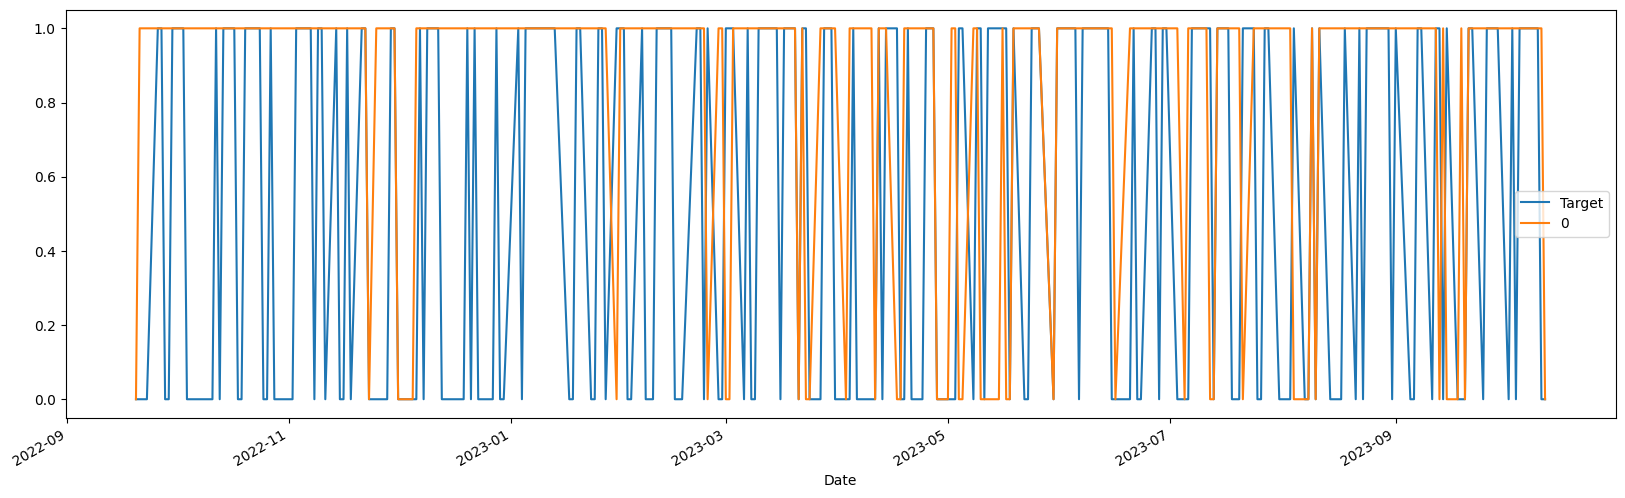

In [ ]:
combined = pd.concat([test['Target'],preds],axis=1)
combined.plot(figsize=(20,6))